# Game Sales Analysis for Ice

## Introduction

Online store Ice sells video games all over the world. User reviews, expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. Using the datasets, identify the patterns to determine whether a games succeeds or not. Doing this will allow one to spot potential big winners and plan advertising campaigns. The dataset contains the abbreviation ESRB for The Entertainment Software Rating Board which evalutes a game's content and assigns an age rating such as Teen or Mature.

## Data Overview ##

In [1]:
# Import necessary libraries
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
games = pd.read_csv('datasets/games.csv')

In [3]:
# Display the first few rows of the dataset
display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Data preprocessing

In [4]:
# Display the column names of the dataset
column_names = games.columns.tolist()
display(column_names)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [5]:
# Renaming columns for better readability
games = games.rename(
      columns=
    {
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    })

In [6]:
# Checking if the renaming was successful
column_names = games.columns.tolist()
display(column_names)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [7]:
# Display the data types of each column
n_rows, n_cols = games.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 16715 rows and 11 columns


In [8]:
# Display informative summary of the dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
# Display descriptive statistics of the dataset
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Duplicates

In [10]:
# Check for duplicates in the dataset
duplicated_games = games[games.duplicated()]
print(f"Number of duplicated games: {duplicated_games.shape[0]}")

Number of duplicated games: 0


In [11]:
# Determining the number of unobvious duplicates in the dataset by grouping by name, platform, and year of release
unobvious_duplicates = games.groupby(['name','platform','year_of_release']).size().reset_index(name='count')
unobvious_duplicates_with_counts = unobvious_duplicates[unobvious_duplicates['count'] > 1]
display(unobvious_duplicates_with_counts)

,name,platform,year_of_release,count
7652,Madden NFL 13,PS3,2012.0,2


In [12]:
# Dropping duplicates based on name, platform, and year of release
games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

In [13]:
# Checking the number of duplicates remaining after dropping
duplicates_remaining = games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
print(f"Number of duplicates remaining after dropping: {duplicates_remaining}")

Number of duplicates remaining after dropping: 0


When looking for the duplicates in the overall 'games' DataFrame, there were no duplicates found. But, when I looked for the duplicates in multiple columns, there was one found, so end up dropping it. 

### Missing values ###

In [14]:
# Displaying the number of missing values in each column
display(games.isna().sum())

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

From the code above, it is known that columns 'year_of_release', 'genre', 'name', 'critic_score', 'user_score', and 'rating' have some missing values. It is important to deal with those missing data as it effects the conclusion one might get to. 

In [15]:
# Displaying the percentage of missing values in each column
games.isnull().sum()/len(games)

name               0.000060
platform           0.000000
year_of_release    0.016095
genre              0.000060
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513193
user_score         0.400886
rating             0.404775
dtype: float64

In [16]:
# Display the number of unique values in 'year_of_release' column
display(games['year_of_release'].value_counts(dropna=False).head())

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: count, dtype: int64

In [17]:
# Display the number of unique values in 'critic_score' column
display(games['critic_score'].value_counts(dropna=False).head())

critic_score
NaN     8577
70.0     256
71.0     254
75.0     245
78.0     240
Name: count, dtype: int64

In [18]:
# Display the number of unique values in 'user_score' column
display(games['user_score'].value_counts(dropna=False).head())

user_score
NaN    6700
tbd    2424
7.8     324
8       290
8.2     282
Name: count, dtype: int64

In [19]:
# Display the number of unique values in 'rating' column
display(games['rating'].value_counts(dropna=False).head())

rating
NaN     6765
E       3989
T       2961
M       1563
E10+    1420
Name: count, dtype: int64

In [20]:
# Determining the rows where there are missing values in 'name', 'critic_score', 'user_score', and 'rating' columns
missing_games = games[(games['name'].isna()) & (games['critic_score'].isna()) & (games['user_score'].isna()) & (games['rating'].isna())]
display(missing_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


From the code above, it was known that there is one row in which all the columns which have missing data have missing data. 

In [21]:
# Dropping rows with missing values in 'name' column
games = games.dropna(subset=['name'])

So, as one row have most of the columns data missing, and columns 'name' and 'genre', only have this row which have missing data, I end up dropping those two rows.

In [22]:
# Identifying the rows where 'year_of_release', 'critic_score', 'user_score', and 'rating' columns values are missing
missing_four = games[(games['year_of_release'].isna()) & (games['critic_score'].isna()) & (games['user_score'].isna()) & (games['rating'].isna())]
display(missing_four.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN


The above code shows that the there are 85 rows which have missing data in the four columns. Those four columns are the only ones with missing data. Due to this reason, I end up removing those 85 rows from the DataFrame.   

In [23]:
# Dropping rows with missing values in 'year_of_release' column
games = games.dropna(subset=['year_of_release'])

In [24]:
# Identifying the rows where 'critic_score' and 'user_score' columns values are missing
missing_two = games[(games['critic_score'].isna()) & (games['user_score'].isna())]
display(missing_two.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Even after dropping some of the data rows, column 'critic_score' still have around 8461 rows with missing data.

In [25]:
# Converting 'user_score' column 'tbd' (to be determined) values to NaN 
games['user_score'].replace('tbd', np.nan, inplace=True)

As 'tbd' is an abbreviation for to be determined, which means that it is not known yet. So first of all, using the code above I end up converting it to nan which helps us to identify the total missing data in that column. 

In [26]:
# Converting 'year_of_release' column to integer type
games['year_of_release'] = games['year_of_release'].astype(int)

In [27]:
# Converting 'user_score' column to numeric type, coercing errors to NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [28]:
# Checking if there are any remaining missing values in the dataset
print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


In [29]:
# Displaying the percentage of missing values in each column
games.isnull().sum()/len(games)

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514565
user_score         0.546190
rating             0.406009
dtype: float64

In [30]:
# Adding a new column 'total_sales' to the dataset, which is the sum of sales in all regions
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

# Displaying overview of the dataset after adding 'total_sales' column
display(games[['genre','na_sales','eu_sales','jp_sales','other_sales','total_sales']].head())

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Sports,41.36,28.96,3.77,8.45,82.54
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.68,12.76,3.79,3.29,35.52
3,Sports,15.61,10.93,3.28,2.95,32.77
4,Role-Playing,11.27,8.89,10.22,1.00,31.38


Missing reviews might be due to not having enough reviews from critics or users before the data was published. There are some missing data in 'year_of_release' column, because some games may had been released later in certain platforms or regions. Due to this reason, enough reviews might not been collected or available at the time when the data was gathered. Some games might be unpopular and thus would not have attracted enough critcs or users to write a review or rate the game. In ERSB rating, there might be some regional differences which had led to missing data for the column.

For the games DataFrame on which I am working on, to make it easy to understand the data, the column names are renamed. 'na_sales', 'eu_sales', 'jp_sales', and 'other_sales' columns, represents sales in USD million in North America, Europe, Japan, and other countries respectively. Before I had converted sales into integers, but realized that sales should not be converted to integers. Sales are USD values.Converting sales to the integer makes decimals values close to zero like 0.4 to zero values. But converted 'year_of_release' column to integers, as they are presented in whole numbers. Due to which one will lose data. When looking for the duplicates in the overall 'games' DataFrame, there were no duplicates found. But, when I looked for the duplicates in multiple columns, there was one found, so end up dropping it. Columns 'year_of_release', 'genre', 'name', 'critic_score', 'user_score', and 'rating' have some missing values. As column 'name' only had one row with missing value, so I end up dropping it. The above code shows that the there are 85 rows which have missing data in the four columns. Those four columns are the only ones with missing data. Due to this reason, I end up removing those 85 rows from the DataFrame.As 'tbd' is an abbreviation for to be determined, which means that it is not known yet. So first of all, I end up converting it to 'nan' which helps us to identify the total missing data in that column. As still 'critic_score', 'user_score', and 'rating' columns have around 8000 missing values, filling or dropping those missing would effect the analysis, so I just kept those columns with missing values as they were. To make further analysis easier, I added a new column 'total_sales' which includes the sum of all sales. Lastly, now we will start our analysis to test the two hypothesis which are whether the average user ratings of the Xbox One are equal to that of PS4 platform and if the average user ratings of the games from action genre are equal to that of sports genre. 

## Data Analysis ##

### How many games were released in different years. Is the data for every period significant?

In [31]:
# Determining the number of unique games released each year. 
games_per_year = games.groupby('year_of_release')['name'].nunique()
display(games_per_year.head())

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: name, dtype: int64

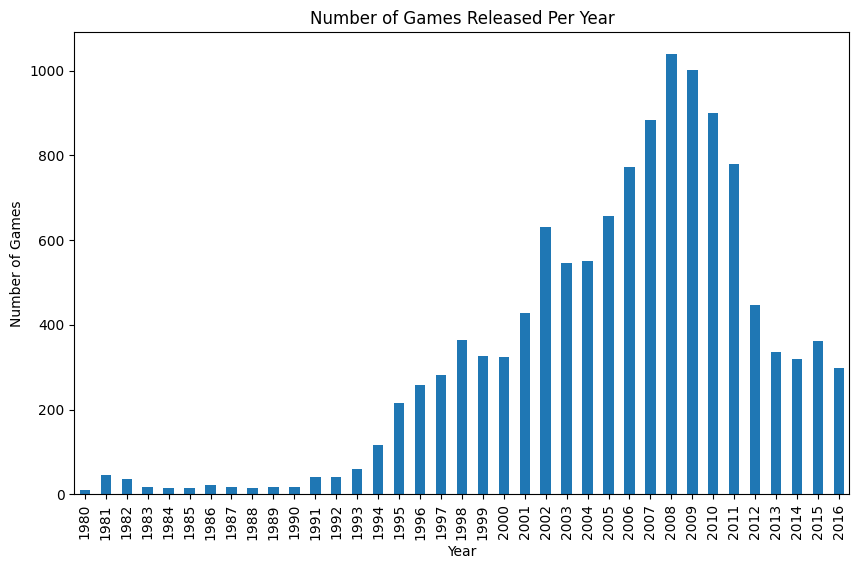

In [32]:
# Creating a bar plot to visualize the number of games released per year
games_per_year.plot(kind='bar', 
                    figsize=(10, 6))
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

I think the data is not significant because there is a huge decline in the number of games after year 2011. This decline is surprising to me,as the use of technology is increasing day by day  and so the use of games. So, I think there should be enough data after 2011. Also, before year 2011, the number of games is almost double to that of after 2011. 

In [33]:
# Look at how sales varied from platform to platform.
total_sales_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(total_sales_platform.head())

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

In [34]:
# Choose the platforms with the greatest total sales
top_platform = total_sales_platform.head(10).index
display(top_platform)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [35]:
# Filter the dataset to include only the top platforms
top_platforms = games[games['platform'].isin(top_platform)]
display(top_platforms.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [36]:
# Including only the relevant columns for the top platforms
top_platforms = games[games['platform'].isin(top_platform)][['platform', 'year_of_release', 'total_sales']]
display(top_platforms.head())

,platform,year_of_release,total_sales
0,Wii,2006,82.54
2,Wii,2008,35.52
3,Wii,2009,32.77
6,DS,2006,29.80
7,Wii,2006,28.91


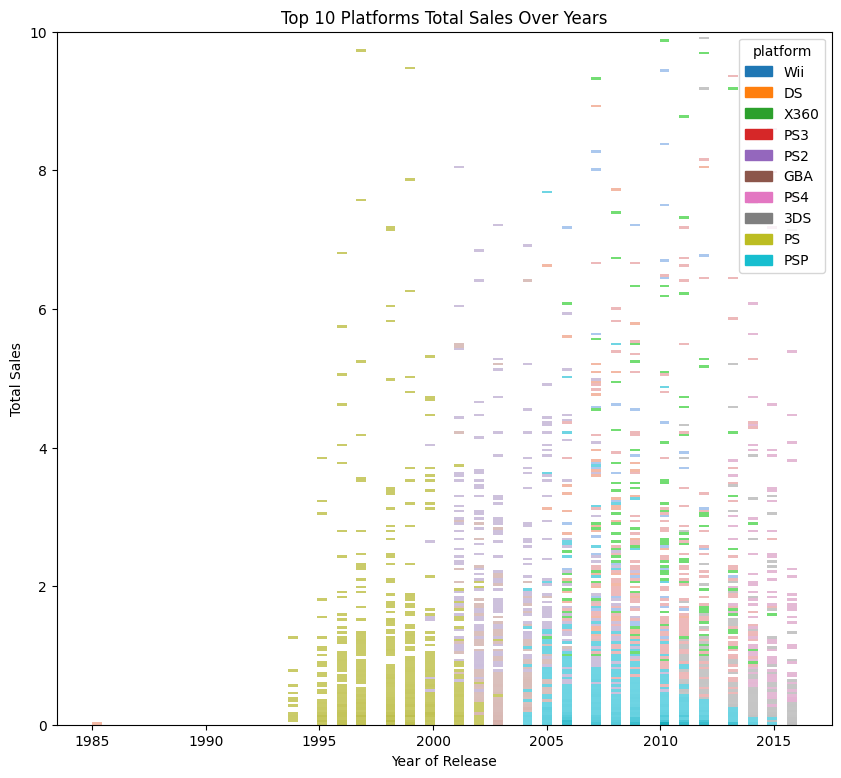

In [37]:
# Create a histogram to visualize the total sales of the top platforms over the years
plt.figure(figsize=(10, 9))
sns.histplot(data=top_platforms,
              x='year_of_release', 
              y='total_sales', 
              hue='platform')
plt.title('Top 10 Platforms Total Sales Over Years')
plt.ylim(0, 10)
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()

From the graph, it is known that platform 'Wii' was at the top among list of platforms with highest total sales over years. But, it can be known that this platform didn't last for long time. Along with this, there are some platform such as 'PS', 'PSP', which are there for long time compare to that of 'Wii' but were among the top 10 platforms with the lowest sales over the years. 

Text(0, 0.5, 'Total Sales')

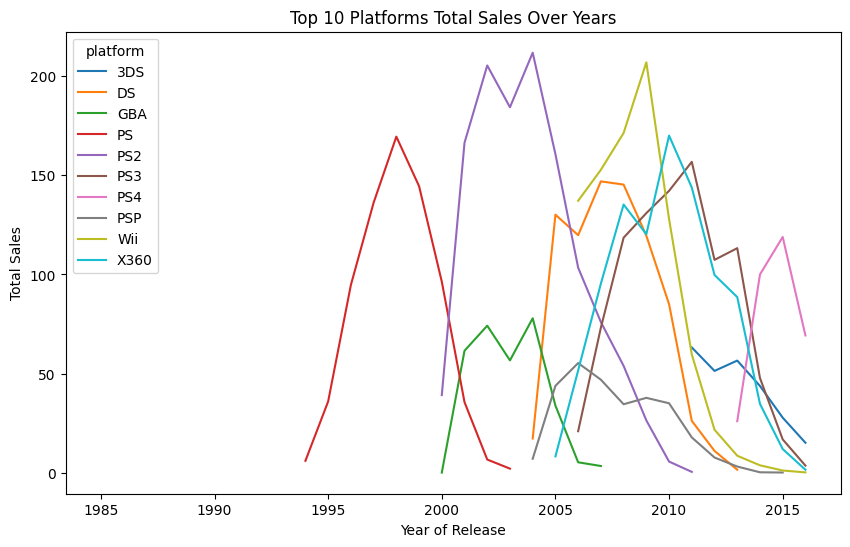

In [38]:
# Create a pivot table to visualize the total sales of the top platforms over the years
top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,6))

plt.title('Top 10 Platforms Total Sales Over Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')

In [39]:
# Find platforms that used to be popular but now have zero sales.
last_sales_year = games[games['total_sales'] > 0].groupby('platform')['year_of_release'].max()
display(last_sales_year.head())

platform
2600    1989
3DO     1995
3DS     2016
DC      2008
DS      2013
Name: year_of_release, dtype: int32

In [40]:
# Find the most recent year in the dataset
recent_year = games['year_of_release'].max()
display(recent_year)

2016

In [41]:
# Find platforms that have not had sales in the most recent year
unpopular_platforms = last_sales_year[last_sales_year < recent_year]
display(unpopular_platforms.head())

platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
Name: year_of_release, dtype: int32

In [42]:
# How long does it generally take for new platforms to appear and old ones to fade?
platform_lifespan = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
display(platform_lifespan.head())

,min,max
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,1985,2013


In [43]:
# Calculate the lifespan of each platform by subtracting the minimum year from the maximum year
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
display(platform_lifespan.sort_values(by='lifespan', ascending=False).head())

,min,max,lifespan
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11


In [44]:
# Calculate the unique platforms released each year
new_platforms_per_year = games.groupby('year_of_release')['platform'].nunique().diff()
display(new_platforms_per_year.head())

year_of_release
1980    NaN
1981    0.0
1982    0.0
1983    1.0
1984    0.0
Name: platform, dtype: float64

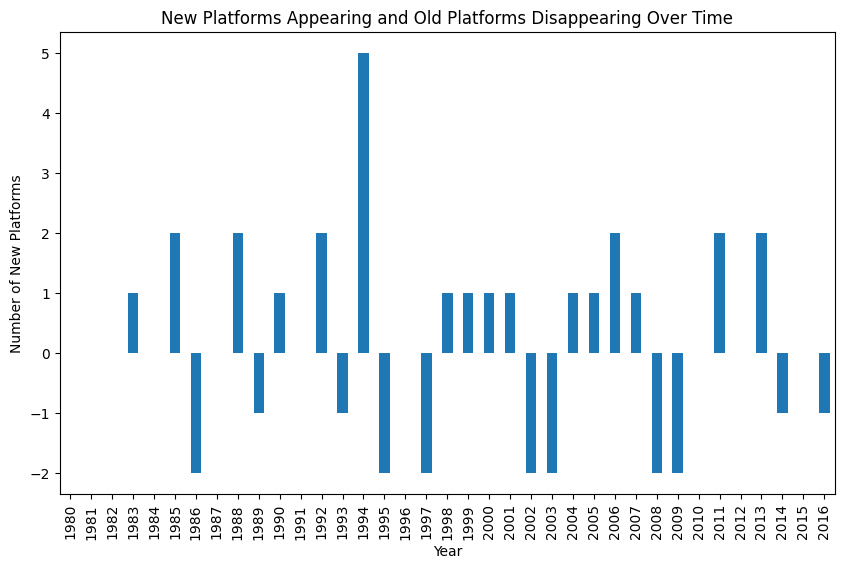

In [45]:
# Create a bar plot to visualize the number of new platforms appearing and old platforms disappearing over time
new_platforms_per_year.plot(kind='bar',
                            figsize=(10, 6))
plt.title('New Platforms Appearing and Old Platforms Disappearing Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Platforms')
plt.show()

In [46]:
# Calculate the number of platforms that faded before the most recent year
faded_platforms = (last_sales_year < recent_year).sum()
print(f"Number of platforms that faded before {recent_year}: {faded_platforms}")

Number of platforms that faded before 2016: 22


The graph above shows the new platforms appearing and old platforms disappearing over time. From the graph, it can be seen that there are 22 platforms which faded before 2016. Among those, there are some new platforms which started appearing and end up disappearing before 2016. 

In [47]:
# Determine what period you should take data for. The data should allow you to build a model for 2017. 
relevant_data = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2017)]
display(relevant_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Based on the relevant reason which you explained, it allowed me to build a model for 2017, the period I choose is 2013-2017. 

In [48]:
# Which platforms are leading in sales? 
sales_platform = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(sales_platform.head(10)) 

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64

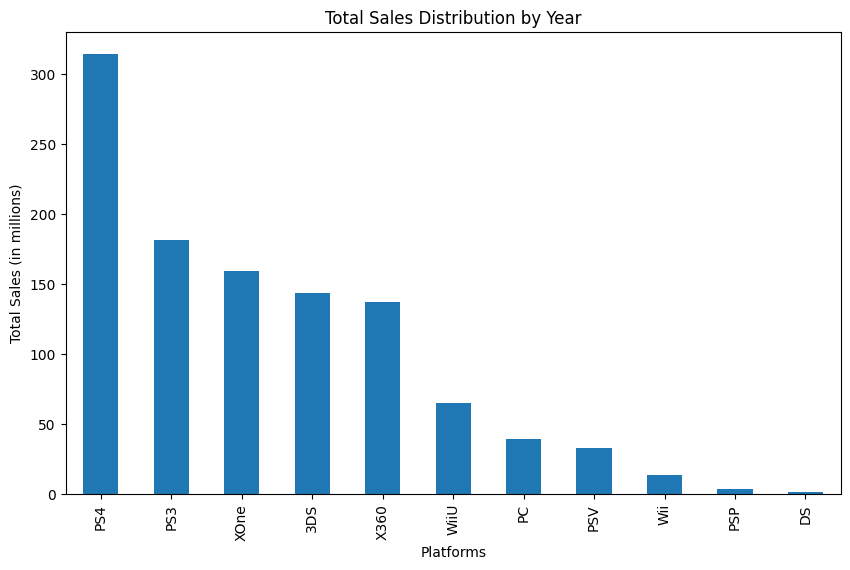

In [49]:
# Create a bar plot to visualize the total sales of the leading platforms
sales_platform.plot(kind='bar',
                     figsize=(10, 6))
plt.title('Total Sales Distribution by Year')
plt.xlabel('Platforms')
plt.ylabel('Total Sales (in millions)')
plt.show()

In [50]:
# Display the top platforms
top_platforms = sales_platform.head().index
print(top_platforms)

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360'], dtype='object', name='platform')


From the graph above shows the total sales distribution of different platforms over the period (2013 - 2017) to build a model for 2017. Among the total sales distibution of different platforms, it is known that 'PS4' platform has the highest sales over time. Followed by that, 'PS3', 'XOne', '3DS', and 'X360' are the platforms where the sales distribution dropped by half to that of platform 'PS4'. Before 2013, if one sees 'Wii' was one platform with the highest number of sales while after 2013 its among the lowest sales. So, it is important to have relevant period which is only 5-6 years older than the year for which we are building a model. 

In [51]:
# Which ones are growing or shrinking? 
sales_per_platform_per_year = relevant_data.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()
display(sales_per_platform_per_year.head())

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


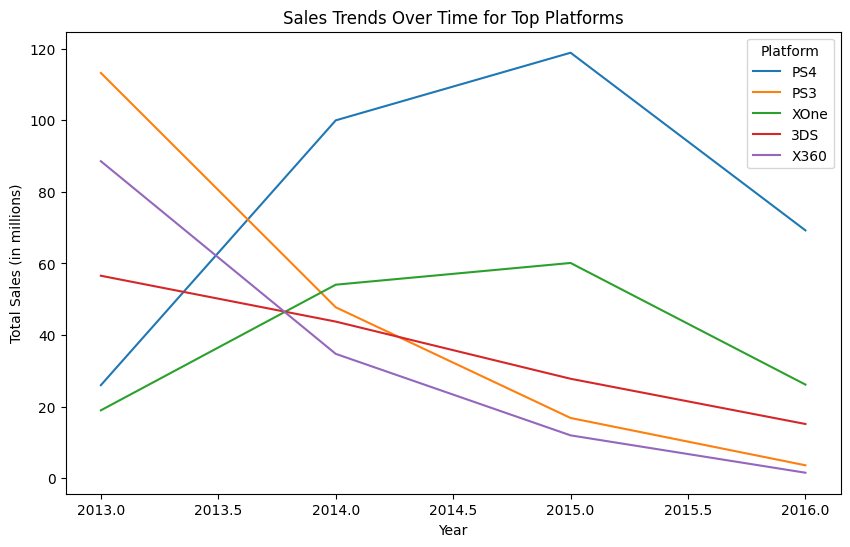

In [52]:
# Create a line plot to visualize the sales trends over time for the top platforms
sales_per_platform_per_year[top_platforms].plot(figsize=(10, 6))
plt.title('Sales Trends Over Time for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.show()

The graph above shows the sales trends over time for top platforms. One can see that platform 'PS4' has been increasing for one year and then again increased for another year and had a drastic fall till 2016. 'XOne' platform has a similar trend like that of 'PS4' but at low level. Platforms 'PS3' and 'X360' almost had the same trend of a huge decrease for a year and then a slight decrease for another year and lastly another drop for a year. Lastly, platform '3DS' had a straight decline from year 2013 to 2016. 

In [53]:
# Filling missing values with 0 for platforms that have no sales in a given year
platform_sales_change = sales_per_platform_per_year.diff().fillna(0)

# Calculate the total sales change for each platform
platform_growth = platform_sales_change.sum()

# Sorting the platforms by their total sales change
growing_platforms = platform_growth.sort_values(ascending=False)

# Display the platforms showing the most growth and decline
print("Platforms showing the most growth:")
display(growing_platforms.head(5))

print("Platforms showing the most decline:")
display(growing_platforms.tail(5))

Platforms showing the most growth:


platform
PS4     43.26
XOne     7.19
DS       0.00
PSP     -3.02
PSV     -6.34
dtype: float64

Platforms showing the most decline:


platform
Wii      -8.41
WiiU    -17.05
3DS     -41.43
X360    -87.06
PS3    -109.65
dtype: float64

From the code above, it is known that from the relevant data, the platforms showing the most growth are 'PS4', 'XOne', 'DS', 'PSP', 'PSV', while the platforms showing the most decline are 'Wii', 'WiiU', '3DS', 'X360', and 'PS3'. Among those platforms with most growth, I think 'PS4', and XOne' are the only ones with actual growth because there are other platforms but their sales are in negatives, so I think the sales of rest of the platforms are still in decline. 

In [54]:
# Select several potentially profitable platforms.
profitable_platforms = growing_platforms[growing_platforms > 0]

# Display the potentially profitable platforms
print("Potentially profitable platforms:")
print(profitable_platforms)

Potentially profitable platforms:
platform
PS4     43.26
XOne     7.19
dtype: float64


Among all the platforms, potentially most profitable platforms are 'PS4' and 'XOne' as those are the only platforms with positive growth while other platforms growth are declining and so have negative sale difference. 

In [55]:
# Using pivot table to visualize the total sales of the relevant data
relevant_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


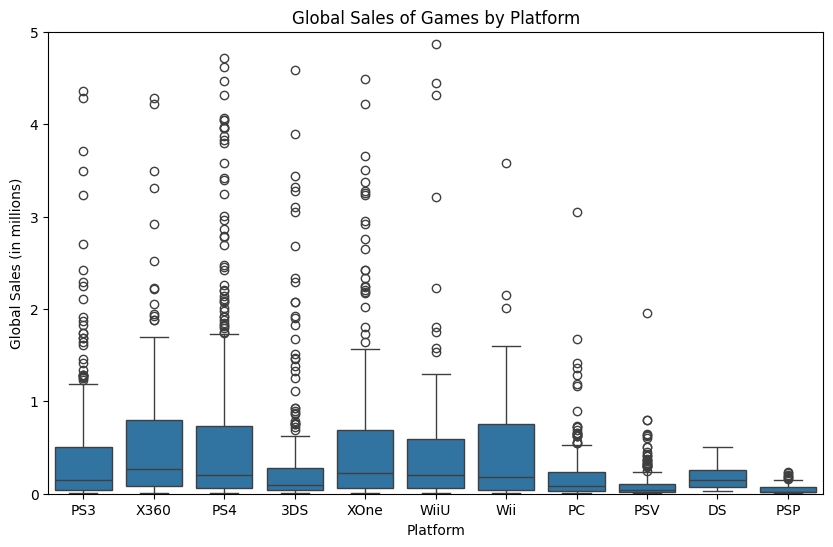

In [56]:
# Create a box plot to visualize the distribution of each game's total sales  by platform
plt.figure(figsize=(10,6))
sns.boxplot(x='platform', y='total_sales', data=relevant_data)
plt.ylim(0, 5)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

One can see that all the platforms have outliers except platform 'DS'. For platform 'PS4', the median line is not in the center, which represents that most of the sales for this platform is higher than the median of the data. This is similar to other platforms such as 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'Wii', and 'PC'. One can see that among all the platforms, 'X360', 'PS4', 'XOne', and 'Wii' have larger box  which indicates more variability. While other platforms have smaller box which means less variability. Most of the outliers are on the upper side of the boxplots, so most of the platforms had some games which are doing great in sales compare to most of the games in a platform. 

I think the differences in the sales are significant due to real differences rather than random chance. Therefore, some platforms may indeed perform better in sales than others.

In [57]:
# What about average sales on various platforms? Describe your findings.
average_sales_platform = relevant_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(average_sales_platform.head(10))

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
Name: total_sales, dtype: float64


From the average sales on various platforms, it is known that platforms such as 'PS4' and 'X360' are one of the highest average sales among all the platforms followed by 'XOne', 'Wii', 'WiiU', and 'PS3' whose average sales are atleast above 0.50. 

In [58]:
# Take a look at how user and professional reviews affect sales for one popular platform. 
ps4_platform = games[games['platform'] == 'PS4']

The one popular platform I choose is 'PS4', because it was growing till 2015 and then started shrinking. But, even it was shrinking, the sales were still high compare to that of other platform. 

In [59]:
# Add a new column 'total_reviews' to the dataset, which is the sum of critic and user scores
ps4_platform['total_reviews'] =  ps4_platform[['critic_score','user_score']].sum(axis=1)

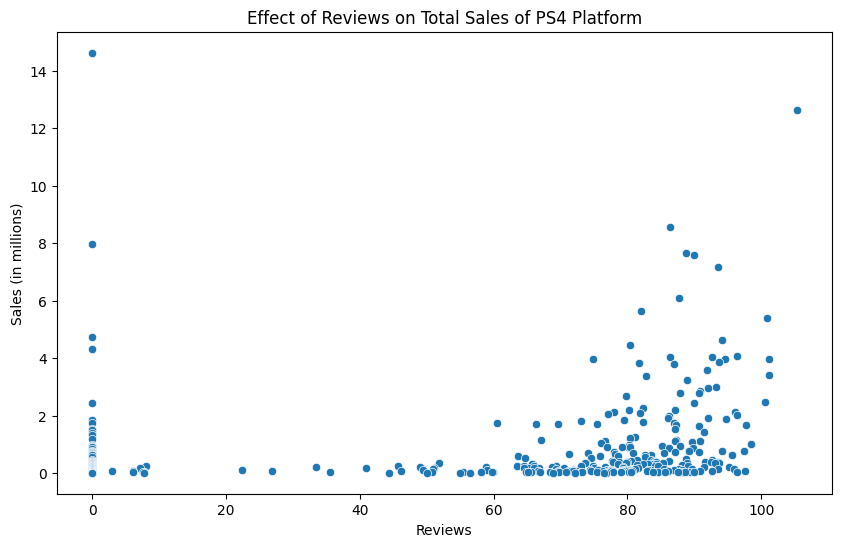

In [60]:
# Create a scatter plot to visualize the relationship between reviews and total sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_reviews', 
                y='total_sales', 
                data=ps4_platform)
plt.title('Effect of Reviews on Total Sales of PS4 Platform')
plt.xlabel('Reviews')
plt.ylabel('Sales (in millions)')
plt.show()

From the scatterplot above, it is known that when the total review scores were lower than 60, there were no change in the number of sales. But after the total review scores reached around 80, one can see an increase in the number of sales over time. 

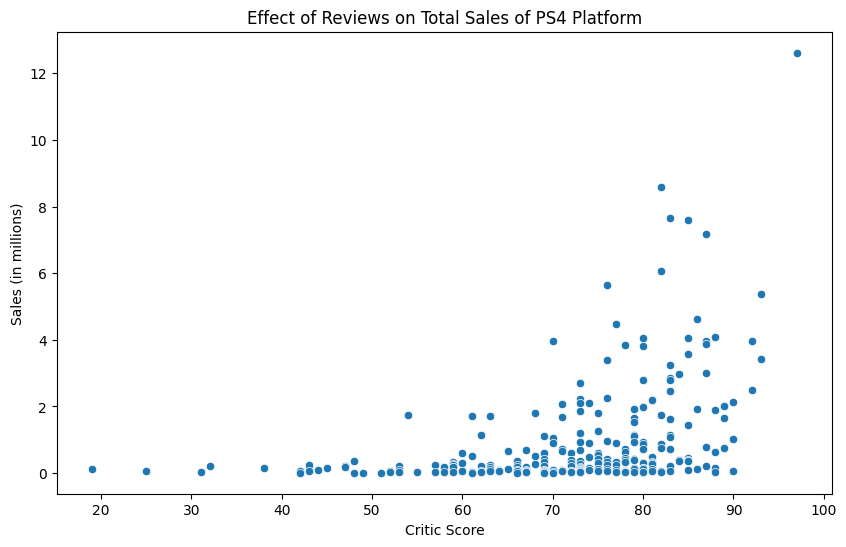

In [61]:
# Create a scatter plot to visualize the relationship between critic score and total sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=ps4_platform)
plt.title('Effect of Reviews on Total Sales of PS4 Platform')
plt.xlabel('Critic Score')
plt.ylabel('Sales (in millions)')
plt.show()

The scatterplot above shows the correlation between the critic score and sales of PS4 platform. One can see that there was no effect of reviews on sales. But after critic review scores reached to 60 one can see slight increase in the number of sales, and then a huge increase by the time critic review scores reaches between 80 to 100. This shows that the games with good critic scores do well with their sales.  So if the critic score of the games increases, the amount of sales increases. 

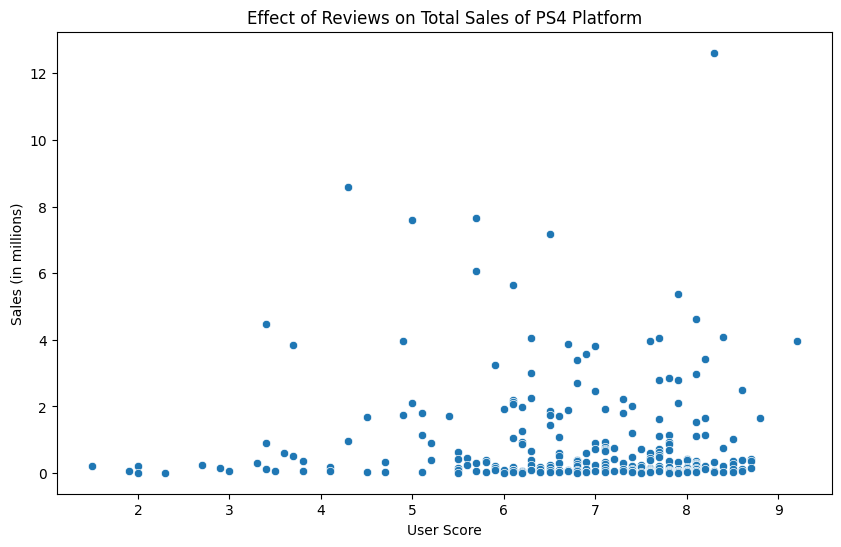

In [62]:
# Create a scatter plot to visualize the relationship between user score and total sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', 
                y='total_sales', 
                data=ps4_platform)
plt.title('Effect of Reviews on Total Sales of PS4 Platform')
plt.xlabel('User Score')
plt.ylabel('Sales (in millions)')
plt.show()

The scatterplot above shows the correlation between the user score and sales of PS4 platform. After the user review scores reached around 3 one can see an increase in the number of sales, and then a huge increase by the time user review scores reaches to 5-6. This shows that the games with good user scores do well with the sales. So if the user score of the games increases, the amount of sales increases. 

In [63]:
# Create a new dataframe for the PS4 platform
psv_psp_platform = games[(games['platform'] == 'PSV') | (games['platform'] == 'PSP')]

In [64]:
# Drop rows with missing values in 'critic_score' and 'user_score' columns
psv_psp_platform = psv_psp_platform.dropna(subset=['critic_score', 'user_score'])

# Display the first few rows of the new dataframe
display(psv_psp_platform.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
91,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,2.90,2.81,0.24,1.73,88.0,7.6,M,7.68
163,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,0.47,0.55,4.13,0.34,81.0,8.7,T,5.49
204,Grand Theft Auto: Vice City Stories,PSP,2006,Action,1.70,1.99,0.16,1.18,86.0,8.0,M,5.03
272,Daxter,PSP,2006,Platform,2.45,1.01,0.00,0.75,85.0,8.7,E10+,4.21
344,Midnight Club 3: DUB Edition,PSP,2005,Racing,1.65,1.21,0.00,0.79,74.0,8.4,E10+,3.65


In [65]:
# Add a new column 'total_reviews' to the dataset, which is the sum of critic and user scores
psv_psp_platform['total_reviews'] =  psv_psp_platform[['critic_score','user_score']].sum(axis=1)

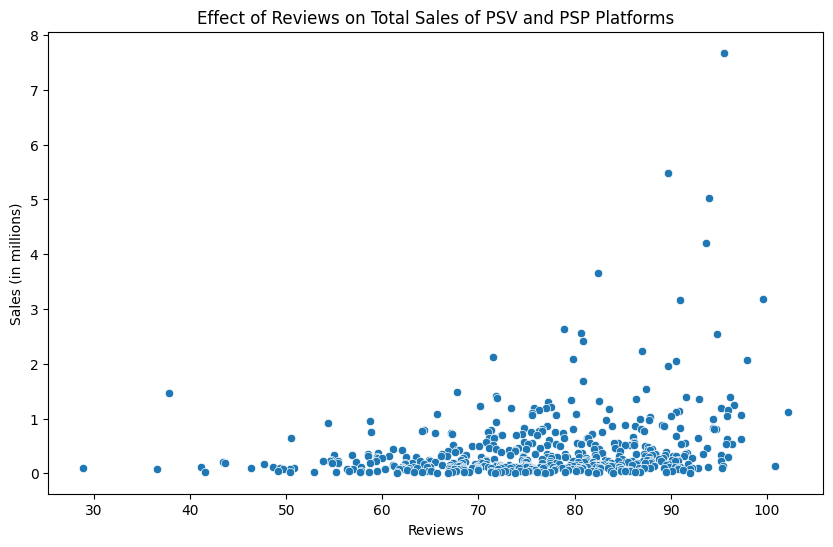

In [66]:
# Create a scatter plot to visualize the relationship between reviews and total sales for PSV and PSP platforms
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_reviews', 
                y='total_sales',
                data=psv_psp_platform)
plt.title('Effect of Reviews on Total Sales of PSV and PSP Platforms')
plt.xlabel('Reviews')
plt.ylabel('Sales (in millions)')
plt.show()

From the scatterplot above, it is known that when the total review scores were lower than 60, there were no change in the number of sales. But after the total review scores reached around 80, one can see an increase in the number of sales over time.

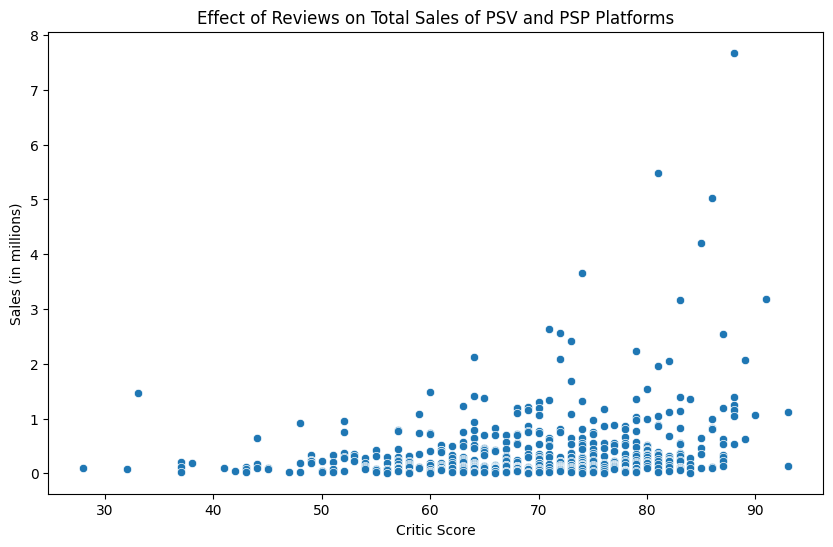

In [67]:
# Create a scatter plot to visualize the relationship between critic score and total sales for PSV and PSP platforms
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=psv_psp_platform)
plt.title('Effect of Reviews on Total Sales of PSV and PSP Platforms')
plt.xlabel('Critic Score')
plt.ylabel('Sales (in millions)')
plt.show()

The scatterplot above shows the correlation between the critic score and sales of PSV and PSP platforms. One can see that there was no effect of reviews on sales. But after critic review scores reached to 60 one can see slight increase in the number of sales, and then a huge increase by the time critic review scores reaches between 60 to 100. This shows that the games with good critic scores do well with their sales.  So if the critic score of the games increases, the amount of sales increases. 

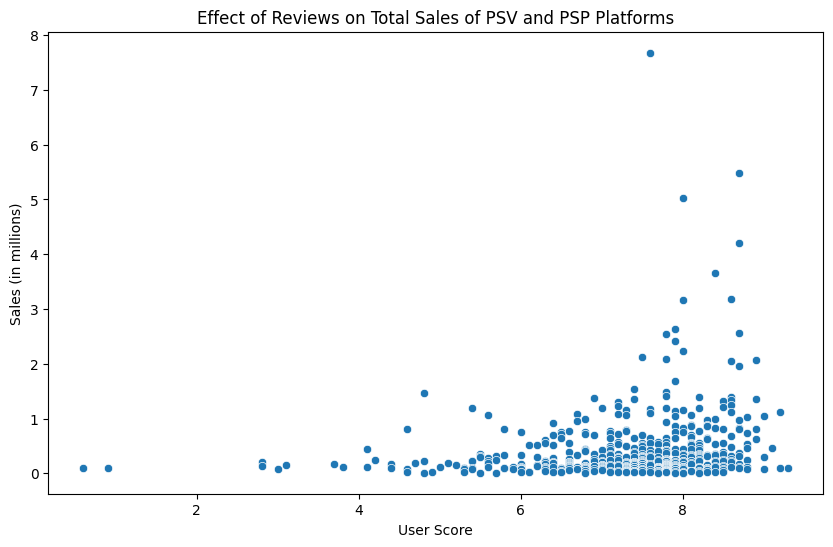

In [68]:
# Create a scatter plot to visualize the relationship between critic score and total sales for PSV and PSP platforms
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score',
                y='total_sales', 
                data=psv_psp_platform)
plt.title('Effect of Reviews on Total Sales of PSV and PSP Platforms')
plt.xlabel('User Score')
plt.ylabel('Sales (in millions)')
plt.show()

The scatterplot above shows the correlation between the user score and sales of PSV and PSP platforms. After the user review scores reached around 3 one can see an increase in the number of sales, and then a huge increase by the time user review scores reaches to 5-6. This shows that the games with good user scores do well with the sales. So if the user score of the games increases, the amount of sales increases. 

In [69]:
# Calculate the correlation between reviews and sales. Draw conclusions.
print(ps4_platform['total_reviews'].corr(ps4_platform['total_sales']))

0.21935045636597206


The correlation coefficient between total review scores and sales sales of platforms PS4 is close to 0 (0.219), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [70]:
# Calculate the correlation between user score and total sales
print(ps4_platform['user_score'].corr(ps4_platform['total_sales']))

-0.031957110204556466


The corelation coefficient between user scores and sales is -0.0320 which is close to 0 but negative side. This shows that there is weaker negative correlation between the user score and sales on platform PS4 which means that as one variable increases, the other tends to decrease. 

In [71]:
# Calculate the correlation between critic score and total sales
print(ps4_platform['critic_score'].corr(ps4_platform['total_sales']))

0.4065679020617813


The correlation coefficient between total review scores and sales of platforms PS4 is close to 0 (0.407), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

### Calculate the correlation between reviews and sales.

In [72]:
# Calculate the correlation between reviews and sales for PSV and PSP platforms
print(psv_psp_platform['total_reviews'].corr(psv_psp_platform['total_sales']))

0.2617928646024588


The correlation coefficient between total review scores and sales sales of platforms PSV and PSP is close to 0 (0.262), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [73]:
# Calculate the correlation between user score and total sales for PSV and PSP platforms
print(psv_psp_platform['user_score'].corr(psv_psp_platform['total_sales']))

0.193299021821393


The correlation coefficient between total review scores and sales of platforms PSV and PSP is close to 0 (0.193), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [74]:
# Calculate the correlation between critic score and total sales for PSV and PSP platforms
print(psv_psp_platform['critic_score'].corr(psv_psp_platform['total_sales']))

0.2582339883354068


The correlation coefficient between total review scores and sales sales of platforms PSV and PSP is close to 0 (0.258), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

First, I choose 'PS4' as one of the populars platforms to determine the relationship of 'total review scores', 'critic scores', and 'user scores' on the global sales of 'PS4' platform. On the other side, I choose 'PSV' and 'PSP' as other platforms to determine the relationship of 'total review scores', 'critic scores', and 'user scores' on the global sales of 'PSV' and 'PSP' platform. From the correlation coefficient, it is known that total review scores and critic scores have weaker positive relationship with sales of 'PS4' platform and with sales of 'PSV' and 'PSP' platforms. So if total review scores are decreasing, the sales are increasing. But user scores have weaker positive relationship with sales of PSP and PSV platforms and weaker negative relationship with sales of PS4 platforms. So if the user score is decreasing then the sales of PSP and PSV platforms are increasing and the sales of PS4 are decreasing. 

But, as all the correlation coefficient are close to 0, it means that there is a lack of linear correlation and so change in one variable does not help in predicting changes in the other variable.

### Compare the sales of the same games on other platforms.

In [75]:
# Determining the sales of games that were released on multiple platforms. 
# Filter the dataset to include only games released on multiple platforms
multiplatform_games = relevant_data.groupby('name').filter(lambda x: x['platform'].nunique() > 1)
display(multiplatform_games[['name','platform','total_sales']].head())

,name,platform,total_sales
16,Grand Theft Auto V,PS3,21.05
23,Grand Theft Auto V,X360,16.27
31,Call of Duty: Black Ops 3,PS4,14.63
42,Grand Theft Auto V,PS4,12.62
60,Call of Duty: Ghosts,X360,10.24


In [76]:
# Calculate the total sales for each game across all platforms
mean_sales_per_platform = multiplatform_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
display(mean_sales_per_platform.head())

platform
PS4     0.884335
X360    0.747111
Wii     0.618636
XOne    0.603080
PS3     0.594621
Name: total_sales, dtype: float64

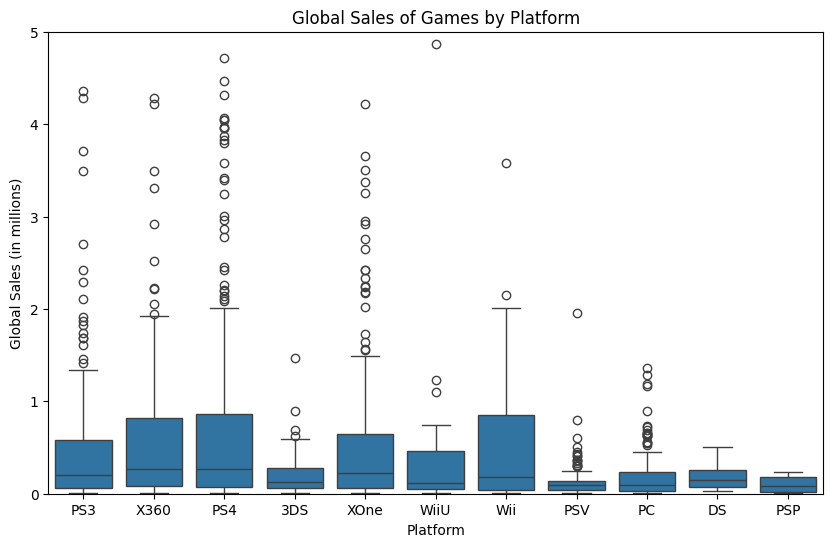

In [77]:
# Create a box plot to visualize the distribution of each game's total sales by platform
plt.figure(figsize=(10,6))
sns.boxplot(x='platform', 
            y='total_sales', 
            data=multiplatform_games)
plt.ylim(0, 5)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

The above boxplot shows the relation of the global sales for multiplatform games by platform and on global sales. All the platforms except 'DS' and 'PSP' have outliers which shows that most of the multiplatform games on these platfrom are doing good in terms of sales. Along with this it can be known that among the platforms with outliers, platforms such as 'PS4' and 'XOne' have more oultiers compare to rest which shows that they have more multiplatform games which are doing good in terms on sales. While 'Wii' platform have only two outliers representing only two multiplatform games even though its variability is more among all the platforms. So, more variability in games does not mean high sales. 

In [78]:
# General distribution of games by genre. 
games_genre = relevant_data['genre'].value_counts()
display(games_genre.head())

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Name: count, dtype: int64

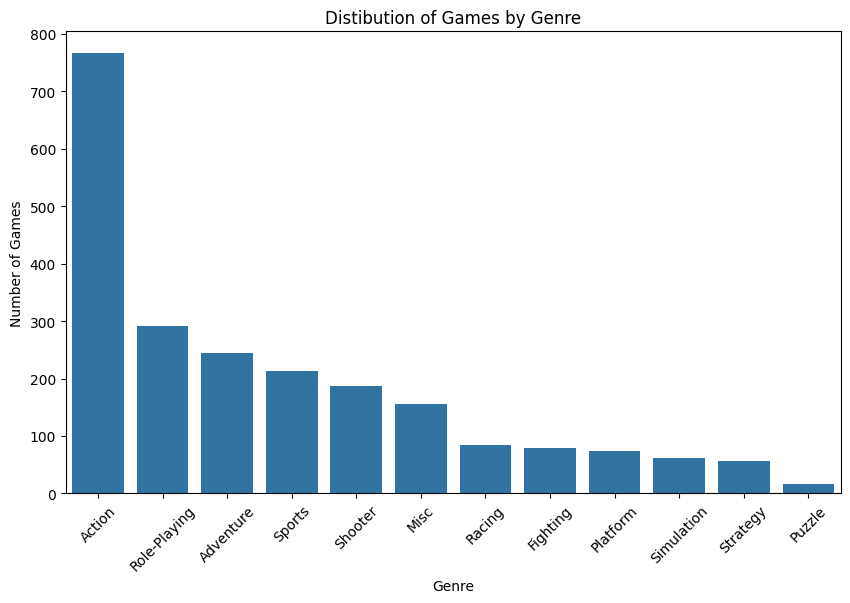

In [79]:
# Create a bar plot to visualize the distribution of games by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=games_genre.index , 
            y=games_genre.values)
plt.title('Distibution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

The above graph shows the distribution of games by genre. Based on the graph, it is known that among all the games, most of the games are action games, followed by role-playing, adeventure, sports, shooter, and misc. Between those two genres, from action to role-playing, the number of games have almost dropped to half. 

In [80]:
# What can we say about the most profitable genres? 
display(games_genre.head())

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Name: count, dtype: int64

Among all different genres, the genres with most games are action, role-playing, adventure, sports, and shooter. But, if genres are having more number of games doesn't mean that they are the most profitable genres. 

In [81]:
# Can you generalize about genres with high and low sales?
genres_total_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Display the genres with high and low sales
print(f"Genres with High Sales:")
display(genres_total_sales.head())

print(f"Genres with Low Sales:")
display(genres_total_sales.tail())

Genres with High Sales:


genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Name: total_sales, dtype: float64

Genres with Low Sales:


genre
Fighting      35.31
Adventure     23.64
Simulation    21.76
Strategy      10.08
Puzzle         3.17
Name: total_sales, dtype: float64

In [82]:
# Determine the average and median sales for each genre
genre_sales_stats = relevant_data.groupby('genre')['total_sales'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)
display(genre_sales_stats.head())

,mean,median
genre,,
Shooter,1.245882,0.450
Sports,0.703972,0.240
Platform,0.576081,0.225
Role-Playing,0.499623,0.125
Racing,0.469294,0.120


In [83]:
# Determine the total sales for the Action genre
action_total_sales = relevant_data[relevant_data['genre']== 'Action']
display(action_total_sales[['name', 'genre', 'total_sales']].head(10))

,name,genre,total_sales
16,Grand Theft Auto V,Action,21.05
23,Grand Theft Auto V,Action,16.27
42,Grand Theft Auto V,Action,12.62
149,The Last of Us,Action,5.86
165,Grand Theft Auto V,Action,5.47
225,The Last of Us,Action,4.72
231,Uncharted: The Nathan Drake Collection,Action,4.62
235,Luigi's Mansion: Dark Moon,Action,4.59
295,Watch Dogs,Action,4.05
304,Assassin's Creed: Unity,Action,3.96


In [84]:
# Determine the total sales for the Shooter genre
shooter_total_sales = relevant_data[relevant_data['genre']== 'Shooter']
display(shooter_total_sales[['name', 'genre', 'total_sales']].head(10))

,name,genre,total_sales
31,Call of Duty: Black Ops 3,Shooter,14.63
60,Call of Duty: Ghosts,Shooter,10.24
69,Call of Duty: Ghosts,Shooter,9.36
87,Star Wars Battlefront (2015),Shooter,7.98
92,Call of Duty: Advanced Warfare,Shooter,7.66
99,Call of Duty: Black Ops 3,Shooter,7.39
154,Destiny,Shooter,5.64
171,Uncharted 4: A Thief's End,Shooter,5.39
179,Call of Duty: Advanced Warfare,Shooter,5.26
242,Halo 5: Guardians,Shooter,4.49


In [85]:
# Determine the total sales for the Sports genre
sports_total_sales = relevant_data[relevant_data['genre']== 'Sports']
display(sports_total_sales[['name', 'genre', 'total_sales']].head(10))

,name,genre,total_sales
77,FIFA 16,Sports,8.58
94,FIFA 17,Sports,7.60
126,FIFA 14,Sports,6.46
143,FIFA 15,Sports,6.08
264,FIFA 15,Sports,4.28
271,FIFA 14,Sports,4.22
314,NBA 2K16,Sports,3.87
417,FIFA 16,Sports,3.25
420,Madden NFL 16,Sports,3.24
469,FIFA 14,Sports,3.01


The codes above show that the genres with high number of games results into having high number of sales, but have low sales per game unit. The genres with most games are action, role-playing, adeventure, sports, shooter, and misc. The genres with high sales are Action, Shooter, Sports, Role-Playing and Misc, while the genres with low sales are Fighting, Adventure, Simulation, Strategy, and Puzzle. From the mean and median of each genre based on total sales shows that 'Action' genres have high number of games (766), but its sales are low (321.87) compare to the number of games. While shooter genre, only had 187 games and the sales were high (232.98) compare to the number of games. Also it can be seen that shooter genre mean is 1.25 while that of action is 0.420. This shows that shooter genre have higher sales per game unit while action genre have lower sales per game unit. Most of the games from shooter genre have higher sales and are doing well while there are only some games from action genre which are doing well while the rest are struggling.

### Create a user profile for each region ###

In [86]:
# Determine the sales in each region for each platform
sales_per_platform_each_region = relevant_data.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()
display(sales_per_platform_each_region.head())

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
DS,0.57,0.85,0.00
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96


In [87]:
# Determine the sales in North America for each platform
sales_per_patform_na_sales = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
display(sales_per_patform_na_sales.head())

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [88]:
# Determine the sales in Europe for each platform
sales_per_patform_eu_sales = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
display(sales_per_patform_eu_sales.head(5))

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [89]:
# Determine the sales in Japan for each platform
sales_per_patform_jp_sales = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
display(sales_per_patform_jp_sales.head(5))

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

In [90]:
# Sum of sales in North America for all platforms
na_total_sales = sales_per_patform_na_sales.sum()
print(na_total_sales)

437.71


In [91]:
# Sum of sales in Europe for all platforms
eu_total_sales = sales_per_patform_eu_sales.sum()
print(eu_total_sales)

392.23


In [92]:
# Sum of sales in Japan for all platforms
jp_total_sales = sales_per_patform_jp_sales.sum()
print(jp_total_sales)

140.78


In [93]:
# A new column 'na_market_share' is created to calculate the market share of each platform in North America
sales_per_patform_na_sales['na_market_share'] = (sales_per_patform_na_sales/na_total_sales)*100
display(sales_per_patform_na_sales['na_market_share'].head())

platform
PS4     24.842933
XOne    21.274360
X360    18.656188
PS3     14.507322
3DS      8.727239
Name: na_sales, dtype: float64

In [94]:
# A new column 'eu_market_share' is created to calculate the market share of each platform in Europe
sales_per_patform_eu_sales['eu_market_share'] = (sales_per_patform_eu_sales/eu_total_sales)*100
display(sales_per_patform_eu_sales['eu_market_share'].head())

platform
PS4     35.971241
PS3     17.288326
XOne    13.152997
X360    10.840578
3DS      7.893328
Name: eu_sales, dtype: float64

In [95]:
# A new column 'jp_market_share' is created to calculate the market share of each platform in Japan
sales_per_patform_jp_sales['jp_market_share'] = (sales_per_patform_jp_sales/jp_total_sales)*100
display(sales_per_patform_jp_sales['jp_market_share'].head())

platform
3DS     48.167353
PS3     16.586163
PSV     13.205001
PS4     11.336838
WiiU     7.728371
Name: jp_sales, dtype: float64

In [96]:
# Determine the sales in each region for each genre
genre_each_region = relevant_data.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()
display(genre_each_region.head())

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Adventure,7.14,8.25,5.82
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79


In [97]:
# Determine the sales in North America for each genre
genre_per_na_sales = relevant_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
display(genre_per_na_sales.head())

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [98]:
# Determine the sales in Europe for each genre
genre_per_eu_sales = relevant_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
display(genre_per_eu_sales.head())

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [99]:
# Determine the sales in Japan for each genre
genre_per_jp_sales = relevant_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
display(genre_per_jp_sales.head(5))

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [100]:
# Sum of sales in each region based on game rating
esrb_each_region = relevant_data.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()
display(esrb_each_region)

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59


In [101]:
# Determine the sales in North America for each rating
esrb_na_sales = relevant_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
display(esrb_na_sales)

rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

Text(0, 0.5, 'Sales (millions)')

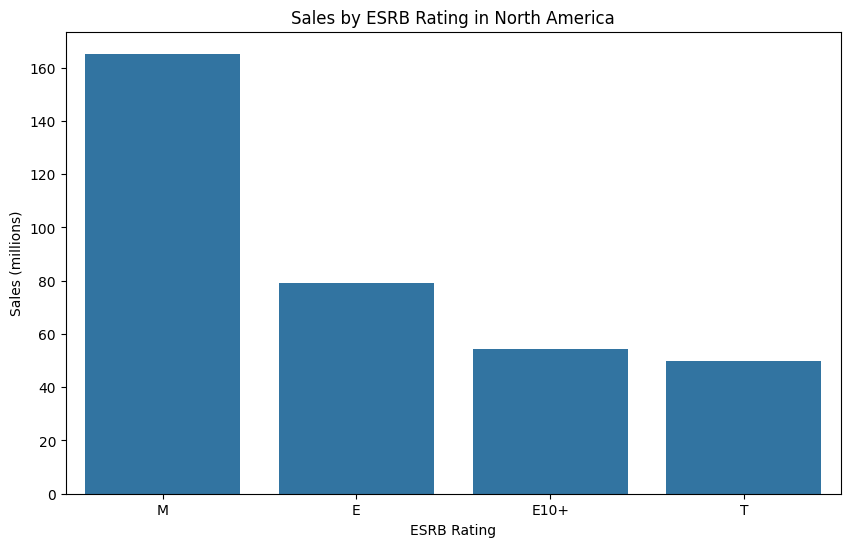

In [102]:
# Create a bar plot to visualize the sales by ESRB rating in North America
plt.figure(figsize=(10, 6))
sns.barplot(x=esrb_na_sales.index, 
            y=esrb_na_sales.values)
plt.title('Sales by ESRB Rating in North America')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (millions)')

The graph above shows the relation between the ESRB Rating of the games and their sales in North America. The ESRB rating with most sales is 'M'(Mature), followed by 'E'(Everyone), 'E10+', and  T'(Teen) lastly  games. 

In [103]:
# Determine the sales in Europe for each rating
esrb_eu_sales = relevant_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
display(esrb_eu_sales)

rating
M       145.32
E        83.36
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

Text(0, 0.5, 'Sales (millions)')

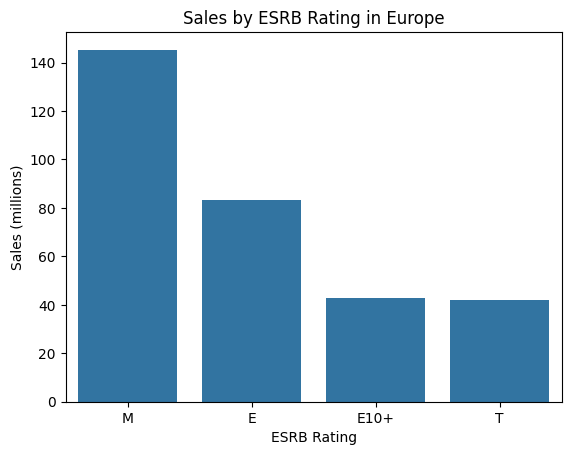

In [104]:
# Create a bar plot to visualize the sales by ESRB rating in Europe
sns.barplot(x=esrb_eu_sales.index, 
            y=esrb_eu_sales.values)
plt.title('Sales by ESRB Rating in Europe')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (millions)')

The graph above shows the relation between the ESRB Rating of the games and their sales in Europe. The ESRB rating with most sales is 'M'(Mature), followed by 'E'(Everyone), 'E10+', and  T'(Teen) games  which is similar to that of North America.

In [105]:
# Determine the sales in Japan for each rating
esrb_jp_sales = relevant_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
display(esrb_jp_sales)

rating
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

Text(0, 0.5, 'Sales (millions)')

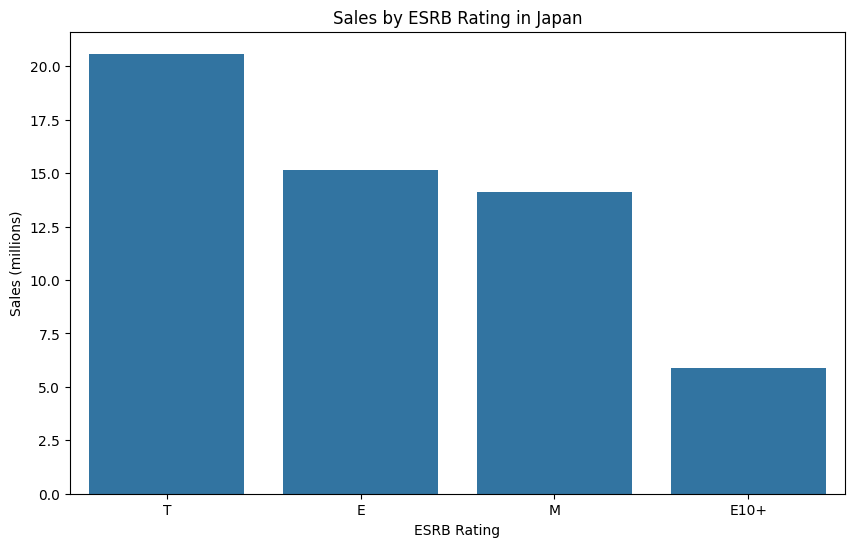

In [106]:
# Create a bar plot to visualize the sales by ESRB rating in Japan
plt.figure(figsize=(10, 6))
sns.barplot(x=esrb_jp_sales.index, 
            y=esrb_jp_sales.values)
plt.title('Sales by ESRB Rating in Japan')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (millions)')

The graph above shows the relation between the ESRB Rating of the games and their sales in Japan. The ESRB rating with most sales is 'T'(Teen), followed by 'E'(Everyone), 'M'(Mature), and lastly 'E10+'. This is different than that of North America and Europe which might be the result of cultural differences. 

In [107]:
# Convert the rating to numeric values for analysis
numeric_rating = {'E': 1, 'T': 2, 'M': 3, 'E10+': 4, 'EC': 5, 'RP': 6}

In [108]:
# Map the rating to numeric values in the relevant data
relevant_data['rating_numeric'] = relevant_data['rating'].map(numeric_rating)

In [109]:
# Calculate the correlation between rating and sales in North America
relevant_data['rating_numeric'].corr(relevant_data['na_sales'])

0.045257685592070045

The correlation coefficient between rating and North American sales is close to 0 (0.045), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [110]:
# Calculate the correlation between rating and sales in Europe
relevant_data['rating_numeric'].corr(relevant_data['eu_sales'])

0.0061596494194559835

The correlation coefficient between rating and Europe sales is close to 0 (0.006), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [111]:
# Calculate the correlation between rating and sales in Japan
relevant_data['rating_numeric'].corr(relevant_data['jp_sales'])

-0.07794786394424232

The corelation coefficient between rating and Japan sales is -0.0779 which is close to 0 but in negative direction. This shows that there is slight negative correlation between the user score and sales on platform PS4.

## Test the hypotheses


### First Hypothesis

**HO:** The average user ratings of the Xbox One and PC platforms are equal. <br>
**HA:** The average user ratings of the Xbox One and PC platforms are not equal. <br>
**Statistical test = t-test** <br>
**Alpha value = 0.05**

In [112]:
# Filter the relevant data to include only rows with non-null user scores
relevant_data = relevant_data.dropna(subset=['user_score'])

In [113]:
# Determining the user ratings for the Xbox One platform
xbox_user_ratings = relevant_data[relevant_data['platform'] == 'XOne']['user_score']
display(xbox_user_ratings.head())

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
Name: user_score, dtype: float64

In [114]:
# Calculate the mean user rating for Xbox One platform
xbox_user_ratings.mean()

6.521428571428572

In [115]:
# Determine the user ratings for the PS4 platform
pc_user_ratings = relevant_data[relevant_data['platform'] == 'PC']['user_score']
print(pc_user_ratings.head())

458     3.9
1095    7.9
1351    2.2
1437    6.0
1530    5.4
Name: user_score, dtype: float64


In [116]:
# Calculate the mean user rating for PC platform
pc_user_ratings.mean()

6.2696774193548395

In [117]:
# Perform a t-test to compare the user ratings between Xbox One and PC platforms

# Set the significance level
alpha = 0.05

# Perform the t-test
results = st.ttest_ind(xbox_user_ratings, pc_user_ratings)

# Display the t-statistic and p-value
print('t-statistic:', results.statistic)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

t-statistic: 1.4788255981357277
p-value: 0.14012658403611647
We can't reject the null hypothesis


As the p-value is greater than alpha, we can't reject the null hypothesis. This shows that the average user ratings of the Xbox One are equal to that of PS4 platform. 

### Second Hypothesis 


**HO:** The average user ratings for the Action and Sports genres are equal. <br>
**HA:** The average user ratings for the Action and Sports genres are not equal. <br>
**Statistical test = t-test** <br>
**Alpha value = 0.05**

In [118]:
# Determine the user ratings for the Action genre
action_user_ratings = relevant_data[relevant_data['genre'] == 'Action']['user_score']
display(action_user_ratings.head())

16     8.2
23     8.1
42     8.3
149    9.1
165    7.9
Name: user_score, dtype: float64

In [119]:
# Calculate the mean user rating for Action genre
action_user_ratings.mean()

6.837532133676092

In [120]:
# Determine the user ratings for the Shooter genre
sports_user_ratings = relevant_data[relevant_data['genre'] == 'Sports']['user_score']
print(sports_user_ratings.head())

77     4.3
94     5.0
126    4.3
143    5.7
264    4.5
Name: user_score, dtype: float64


In [121]:
# Calculate the mean user rating for Sports genre
sports_user_ratings.mean()

5.238124999999999

In [ ]:
# Perform a t-test to compare the user ratings between Action and Sports genres

# Set the significance level
alpha = 0.05

# Perform the t-test
results = st.ttest_ind(action_user_ratings, sports_user_ratings)

# Display the t-statistic and p-value
print('t-statistic:', results.statistic)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

t-statistic: 11.535100577928208
p-value: 1.0517832389140023e-27
We reject the null hypothesis


As the p-value is less than alpha, we can reject the null hypothesis. This shows that the average user ratings of the games from action genre are not equal to that of sports genre. 

## Conclusion ## 

The project is based on analyzing the data which is based on the online store Ice that sells video games all over the world to identify patterns to determine whether a games succeeds or not to spot potential big winners and plan advertising campaigns. 
The number of games released per year is increasing overtime till 2008, and then started to decline. Following this, there was a huge decline after 2011. I think the data used is not significant as the use of technology is increasing day by day and so the use of games which means the number of games releasing should be increasing rather than decreasing.

Platform 'Wii' was at the top among list of platforms with highest total sales over years. But, it can be known that this platform didn't last for long time. Along with this, there are some platform such as 'PS', 'PSP', which are there for long time compare to that of 'Wii' but were among the top 10 platforms with the lowest sales over the years.

Among all the platforms released till 2016, there were 22 platforms which faded before 2016. 

As one said the industry is evolving, the games are getting better, the graphics are getting better, and the users are getting more demanding. So, it is better to focus on the data from 5-6 years to the model year. Thus, the period I choose for 2017 model is 2013-2016. 

Among the total sales distribution of different platforms from 2013 to 2016, 'PS4' platform has the highest sales over time. Following this, 'PS3', 'XOne', '3DS', and 'X360', are the platforms where the sales distribution dropped by half of platform 'PS4'. Before 2013, if one see 'Wii' was one such platform with the highest number of sales while after 2013 its among the lowest sales.  One can see that platform 'PS4' has been increasing for one year and then again increased for another year and had a drastic fall till 2016. 'XOne' platform has a similar trend like that of 'PS4' but at low level. Platforms 'PS3' and 'X360' almost had the same trend of a huge decrease for a year and then a slight decrease for another year and lastly another drop for a year. Lastly, platform '3DS' had a straight decline from year 2013 to 2016. This shows that most of those platforms are shrinking overtime even though their total sales are high.

The platforms showing the most growth are 'PS4', 'XOne', 'DS', 'PSP', 'PSV', while the platforms showing the most decline are 'Wii', 'WiiU', '3DS', 'X360', and 'PS3'. Among those platforms with most growth, I think 'PS4', and XOne' are the only ones with actual growth because there are other platforms but their sales are in negatives, so I think the sales of rest of the platforms are still in decline. From the average sales on various platforms, it is known that platforms such as 'PS4' and 'X360' are one of the highest average sales among all the platforms followed by 'XOne', 'Wii', 'WiiU', and 'PS3' whose average sales are atleast above 0.50. 

The one of the popular platforms I choose is 'PS4', because it was growing till 2015 and then started shrinking. But, even it was shrinking, the sales were still high compare to that of other platform. On the other side, I choose 'PSV' and 'PSP' as other platforms to determine the relationship of 'total review scores', 'critic scores', and 'user scores' on the global sales of 'PSV' and 'PSP' platform. From the correlation coefficient, it is known that total review scores and critic scores have weaker positive relationship with sales of 'PS4' platform and with sales of 'PSV' and 'PSP' platforms. So if total review scores are decreasing, the sales are increasing. But user scores have weaker positive relationship with sales of PSP and PSV platforms and weaker negative relationship with sales of PS4 platforms. So if the user score is decreasing then the sales of PSP and PSV platforms are increasing and the sales of PS4 are decreasing. But, as all the correlation coefficient are close to 0, it means that there is a lack of linear correlation and so change in one variable does not help in predicting changes in the other variable.

Among all the games, most of the games are action games, followed by role-playing, adventure, sports, and shooter. From action to role-playing genre games, the number of games have almost dropped to half. If genres are having more number of games doesn't mean that they are the most profitable genres. Among all different genres, the genres with high sales are Action, Shooter, Sports, Role-Playing and Misc, while the genres with low sales are Fighting, Adventure, Simulation, Strategy, and Puzzle. This shows that the genres with high number of games results into having high number of sales, but have low sales per game unit.  From the mean and median of each genre based on total sales shows that 'Action' genres have high number of games (766), but its sales are low (321.87) compare to the number of games. While shooter genre, only had 187 games and the sales were high (232.98) compare to the number of games. Also it can be seen that shooter genre mean is 1.25 while that of action is 0.420. This shows that shooter genre have higher sales per game unit while action genre have lower sales per game unit. Most of the games from shooter genre have higher sales and are doing well while there are only some games from action genre which are doing well while the rest are struggling.

In North America, the ESRB rating with most sales is 'M'(Mature), followed by 'E'(Everyone), 'E10+', and T'(Teen) lastly games which is similar to that of in Europe. In Japan, the ESRB rating with most sales is 'T'(Teen), followed by 'E'(Everyone), 'M'(Mature), and lastly 'E10+'. This is different than that of North America and Europe which might be the result of cultural differences.

The correlation coefficient between rating and North American sales is 0.045, which means there is no correlatiob between rasting and sales in North America. While the correlation coefficient between rating and Europe sales is 0.006, and that between rating and Japan sales is -0.00779 which shows that there is negative correlation between rating and sales in those two countries. So, if rating increases, so does the sales. 

As the p-value is greater than alpha, we can't reject the null hypothesis. This shows that the average user ratings of the Xbox One are equal to that of PS4 platform. As the p-value is less than alpha, we can reject the null hypothesis. This shows that the average user ratings of the games from action genre are not equal to that of sports genre. 